In [32]:
# bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import scipy.stats as stats
import seaborn as sns

In [2]:
# carregando dados
df = pd.read_csv('../data/housing.csv', sep=',', encoding='utf-8')

In [3]:
# head
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [4]:
# variaveis
x = df.iloc[:,1:2].values # preditora com melhores metricas na regressao simples
y = df.iloc[:,3].values

In [5]:
# modelo
regressao = smf.ols('y ~ x', data=df).fit()

In [6]:
# residuos para avaliaçao do modelo
residuos = regressao.resid

In [7]:
# teste de normalidade dos residuos
"""
Ho = distribuição normal: p > 0.05
Ha = distribuição != normal : p <= 0.05
"""
_, p = stats.shapiro(residuos)
print(p)

9.782326333115975e-16


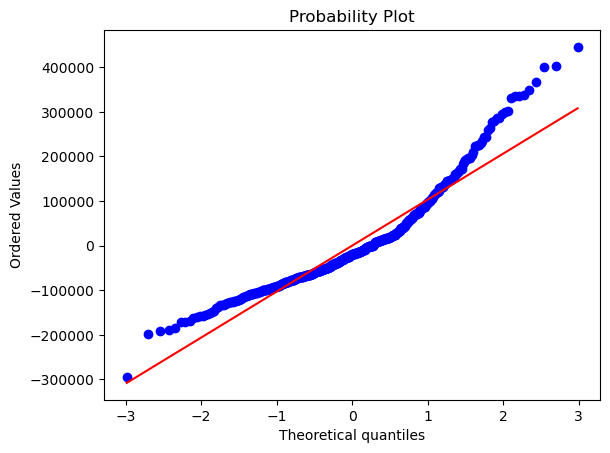

In [8]:
# plot de normalidade dos residuos
stats.probplot(residuos, dist='norm', plot=plt)
plt.show()

In [9]:
# analise estatistica de homocedasticidade
"""
H0 = existe homocedasticidade: p > 0.05
Ha = não existe homocedasticidade: p <= 0.05
"""
estatistica, p, f, fp = sms.het_breuschpagan(regressao.resid, regressao.model.exog)
print(p)

0.020339089399131132


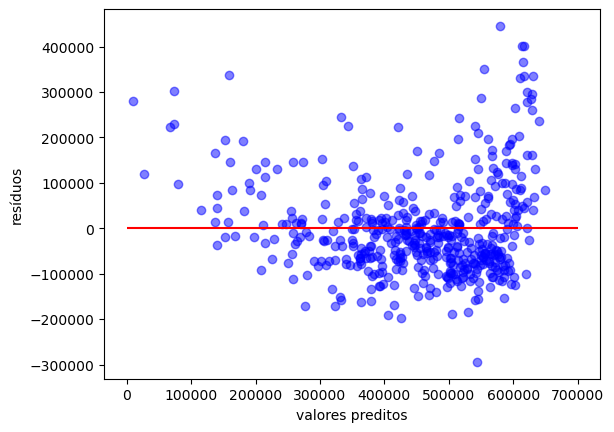

In [10]:
# plot da analise de homocedasticidade dos residuos
plt.scatter(y=residuos,x=regressao.predict(), color='blue',alpha=0.5)
plt.hlines(y=0,xmin=0, xmax=700000, color='red')
plt.ylabel('resíduos')
plt.xlabel('valores preditos')
plt.show()

In [11]:
# outliers nos residuos (entre -3 e 3)
outliers = regressao.outlier_test()

In [12]:
# max
outliers.max()

student_resid    4.227468
unadj_p          0.999732
bonf(p)          1.000000
dtype: float64

In [13]:
# min
outliers.min()

student_resid   -2.762057
unadj_p          0.000028
bonf(p)          0.013809
dtype: float64

In [14]:
# summary do modelo
"""
intercept
p_valor < 0.05 estatisticamente significativo
adjusted r-squared - explica o modelo através dos dados
p_valor da estatistica F < 0.05 - valida o modelo de regressao
"""
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     668.7
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           1.93e-93
Time:                        08:16:06   Log-Likelihood:                -6357.8
No. Observations:                 489   AIC:                         1.272e+04
Df Residuals:                     487   BIC:                         1.273e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.841e+05   1.01e+04     67.551      0.0

/tmp/ipykernel_1639684/2064541555.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(x_plot, x_plot*regressao.params[1] + regressao.params[0], color='r')


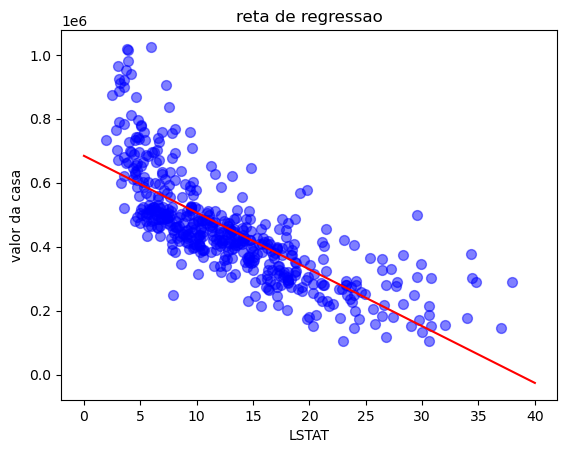

In [15]:
# plot do modelo
plt.scatter(y=df.MEDV, x=df.LSTAT, color='blue', s=50, alpha=0.5)
x_plot = np.linspace(0,40)
plt.plot(x_plot, x_plot*regressao.params[1] + regressao.params[0], color='r')
plt.title('reta de regressao')
plt.ylabel('valor da casa')
plt.xlabel('LSTAT')
plt.show()

## multipla

In [16]:
# modelo
regressao_multipla = smf.ols('MEDV ~ RM + LSTAT + PTRATIO', data=df).fit()

In [17]:
# residuos
residuos = regressao_multipla.resid
residuos

0     -128371.739762
1      -71577.148313
2       81946.881920
3       76551.704130
4      148383.407464
           ...      
484     -1541.448492
485     -4797.202628
486    -46918.775678
487    -61950.456779
488   -192725.539836
Length: 489, dtype: float64

In [21]:
# teste de normalidade dos residuos
"""
Ho = distribuição normal: p > 0.05
Ha = distribuição != normal : p <= 0.05
"""
_, p = stats.shapiro(residuos)
if p <= 0.05:
    print(f'Distribuição não normal com valor de p = {p}')
else:
    print(f'Distribuição normal com valor de p = {p}')

Distribuição não normal com valor de p = 1.0875824685285806e-09


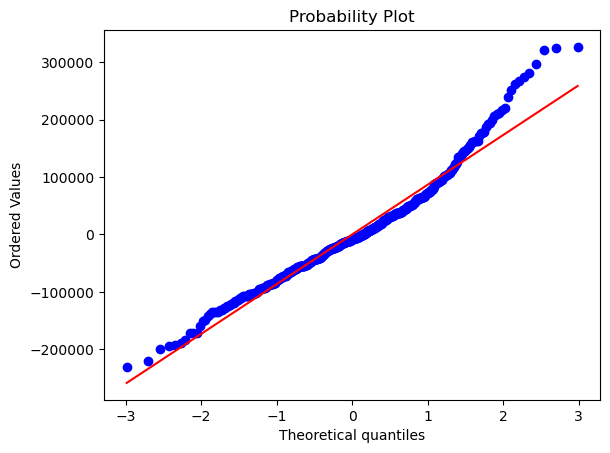

In [19]:
# plot de normalidade dos residuos
stats.probplot(residuos, dist='norm', plot=plt)
plt.show()

In [24]:
# analise estatistica de homocedasticidade (resíduos com variação constante)
"""
H0 = existe homocedasticidade: p > 0.05
Ha = não existe homocedasticidade: p <= 0.05
"""
estatistica, p, f, fp = sms.het_breuschpagan(regressao_multipla.resid, regressao.model.exog)

if p <= 0.05:
    print(f'Não existe homocedasticidade. valor de p = {p}')
else:
    print(f'Existe homocedasticidade. valor de p = {p}')

Não existe homocedasticidade. valor de p = 0.0060161375102096


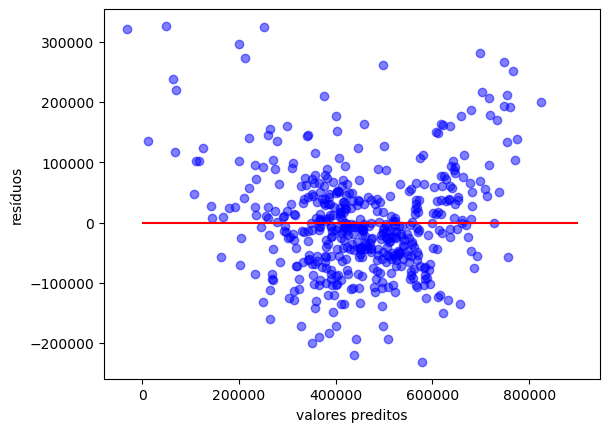

In [26]:
# plot da analise de homocedasticidade dos residuos
plt.scatter(y=residuos,x=regressao_multipla.predict(), color='blue',alpha=0.5)
plt.hlines(y=0,xmin=0, xmax=900000, color='red')
plt.ylabel('resíduos')
plt.xlabel('valores preditos')
plt.show()

In [27]:
# outliers nos residuos (entre -3 e 3)
outliers = regressao_multipla.outlier_test()

In [28]:
# max
outliers.max()

student_resid    3.887418
unadj_p          0.999502
bonf(p)          1.000000
dtype: float64

In [29]:
# min
outliers.min()

student_resid   -2.648018
unadj_p          0.000115
bonf(p)          0.056456
dtype: float64

In [30]:
# ausencia de multicolinearidade
"""
somente entre as independentes
considerada multicolinearidade quando r > 0.9
"""
variaveis = df[['RM','LSTAT','PTRATIO']]
variaveis.corr(method='pearson')

,RM,LSTAT,PTRATIO
RM,1.000000,-0.612033,-0.304559
LSTAT,-0.612033,1.000000,0.360445
PTRATIO,-0.304559,0.360445,1.000000


In [31]:
# summary do modelo
"""
intercept
p_valor < 0.05 - estatisticamente significativo
adjusted r-squared - explica o modelo através dos dados
p_valor da estatistica F < 0.05 - valida o modelo de regressao
"""
print(regressao_multipla.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     410.9
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          9.96e-133
Time:                        08:39:40   Log-Likelihood:                -6259.9
No. Observations:                 489   AIC:                         1.253e+04
Df Residuals:                     485   BIC:                         1.254e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.155e+05   6.88e+04      6.035      0.0

/home/escova/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


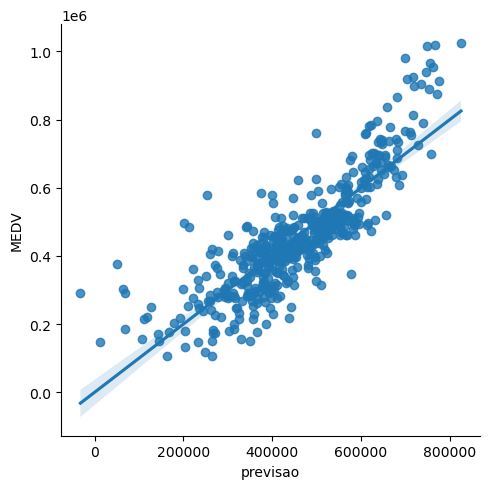

In [39]:
# plot do modelo
df['previsao'] = regressao_multipla.fittedvalues
sns.lmplot(x='previsao', y='MEDV', data=df);